In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [166]:
# read in files
file_audio_features = "Data/audio_features.csv"
file_charts = "Data/billboard_hot100_16-21.csv"
audio_features_df = pd.read_csv(file_audio_features)
charts_df = pd.read_csv(file_charts)
#clean up dfs
audio_features_df.rename(columns={"Track": "Title"}, inplace=True)
audio_features_df.drop(columns="Unnamed: 0", inplace=True)
charts_df.drop(columns="Image", inplace=True)


In [167]:
#creates merged dataframe and cleans data
merged = pd.merge(charts_df, audio_features_df, how="left", on=["Title", "Artist"])
merged.drop(merged.loc[merged.Spotify_ID=="not found"].index, inplace = True)
merged.reset_index(inplace=True, drop=True)
#change datatypes to floats
merged[["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key", "loudness", "mode", "duration_ms", "time_signature"]] = \
    merged[["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "key", "loudness", "mode", "duration_ms", "time_signature"]].apply(pd.to_numeric)

# separate columns for year, month, and day
merged[["Date"]] = merged[["Date"]].apply(pd.to_datetime)
merged['Year'] = merged['Date'].dt.year
merged['Month'] = merged['Date'].dt.month
merged['Day'] = merged['Date'].dt.day
# makes a list of dataframes that contain only 1 year of data
# years_df_list[0] contains 2016 data. 
# years_df_list[5] contains 2021 data. 
years_df_list = [merged[merged['Year'] == y] for y in merged['Year'].unique()]


In [168]:
# sets up groupby object
groupby_weeks = merged.groupby(by="Date")
weekly_means = groupby_weeks.mean()


# Box Plots

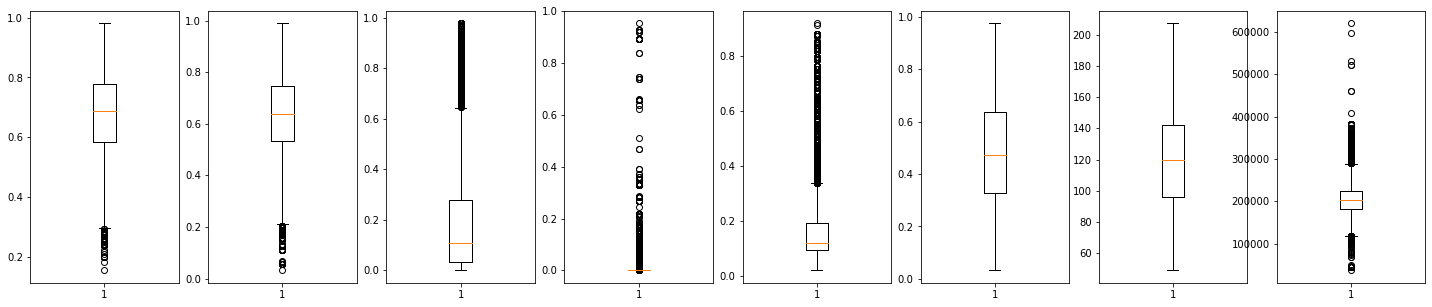

In [169]:
#TODO: spread them out
audio_feature_list = ["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]
fig1, ax1 = plt.subplots(1,8)
for i in range(len(audio_feature_list)):
    ax1[i].boxplot(merged[audio_feature_list[i]])
fig1.set_size_inches(25, 5)
    

# Audio Features over 5 years

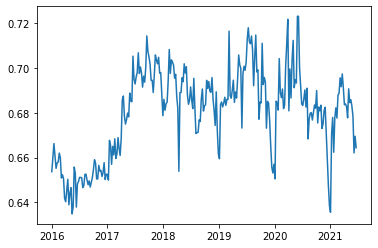

In [170]:
y_axis = weekly_means["danceability"]
dates = weekly_means.index
plt.plot(dates, y_axis)

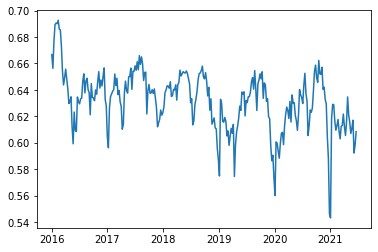

In [171]:
y_axis = weekly_means["energy"]
plt.plot(dates, y_axis)

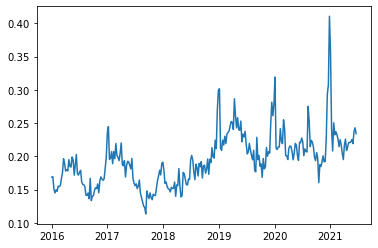

In [172]:
y_axis = weekly_means["acousticness"]
plt.plot(dates, y_axis)

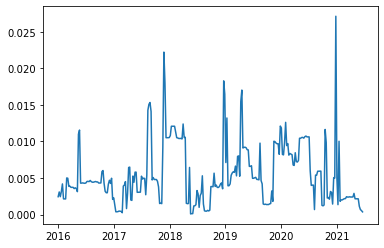

In [173]:
y_axis = weekly_means["instrumentalness"]
plt.plot(dates, y_axis)

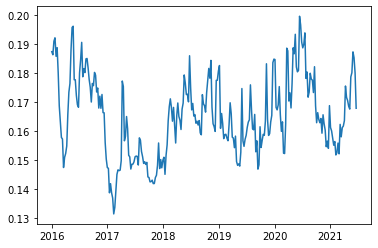

In [174]:
y_axis = weekly_means["liveness"]
plt.plot(dates, y_axis)

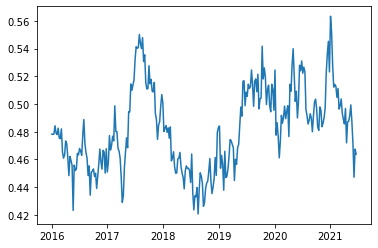

In [175]:
y_axis = weekly_means["valence"]
plt.plot(dates, y_axis)

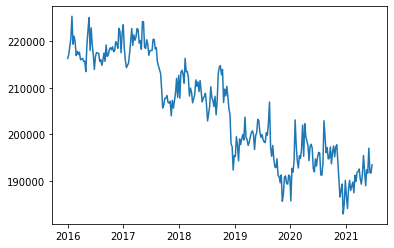

In [176]:

y_axis = weekly_means["duration_ms"]
plt.plot(dates, y_axis)

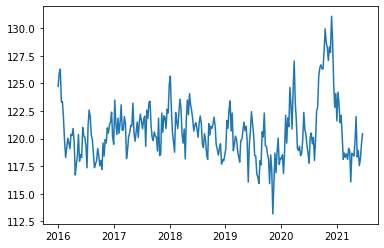

In [177]:
y_axis = weekly_means["tempo"]
plt.plot(dates, y_axis)

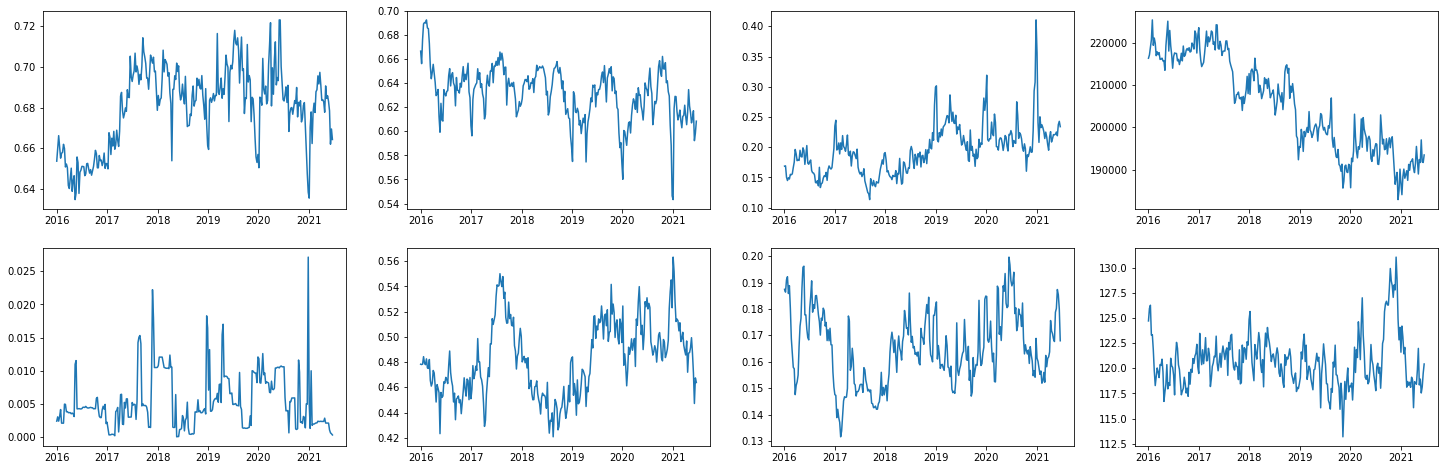

In [178]:
# TODO: add labels and such
fig, (ax1, ax2) = plt.subplots(2, 4)
y_axis = weekly_means["danceability"]
ax1[0].plot(dates, y_axis)
y_axis = weekly_means["energy"]
ax1[1].plot(dates, y_axis)
y_axis = weekly_means["acousticness"]
ax1[2].plot(dates, y_axis)
y_axis = weekly_means["duration_ms"]
ax1[3].plot(dates, y_axis)
y_axis = weekly_means["instrumentalness"]
ax2[0].plot(dates, y_axis)
y_axis = weekly_means["valence"]
ax2[1].plot(dates, y_axis)
y_axis = weekly_means["liveness"]
ax2[2].plot(dates, y_axis)
y_axis = weekly_means["tempo"]
ax2[3].plot(dates, y_axis)
fig.set_size_inches(25, 8)

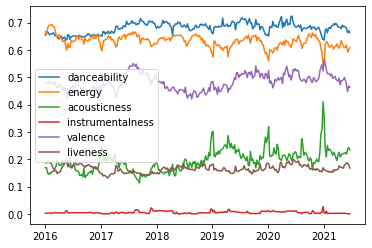

In [179]:
#TODO: add labels or legend, look into spike at end of graph
labels = ["danceability", "energy", "acousticness", "instrumentalness", "valence", "liveness"]
y_axis = weekly_means["danceability"]
plt.plot(dates, y_axis)
y_axis = weekly_means["energy"]
plt.plot(dates, y_axis)
y_axis = weekly_means["acousticness"]
plt.plot(dates, y_axis)
y_axis = weekly_means["instrumentalness"]
plt.plot(dates, y_axis)
y_axis = weekly_means["valence"]
plt.plot(dates, y_axis)
y_axis = weekly_means["liveness"]
plt.plot(dates, y_axis)
plt.legend(labels)

# Seasonality

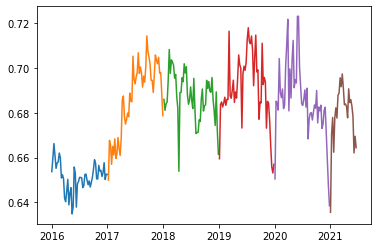

In [180]:

# There always seems to be a drop in danceability of songs at the end of the year

for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["danceability"]
    plt.plot(dates, y_axis)



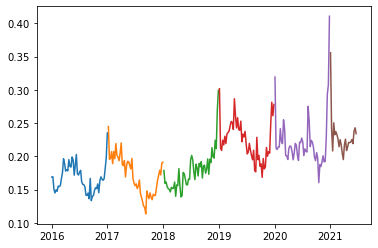

In [181]:

# There always seems to be a spike in acousticness of songs at the end of the year

for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["acousticness"]
    plt.plot(dates, y_axis)



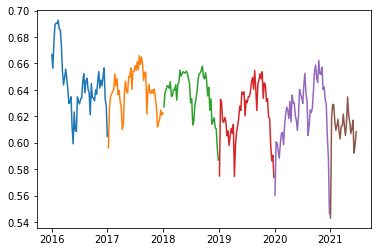

In [182]:

# There always seems to be a drop in energy of songs at the end of the year

for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["energy"]
    plt.plot(dates, y_axis)



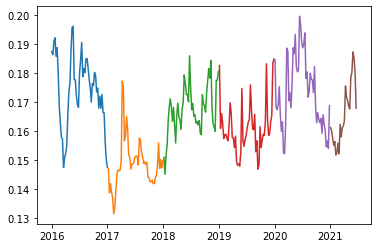

In [183]:
for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["liveness"]
    plt.plot(dates, y_axis)

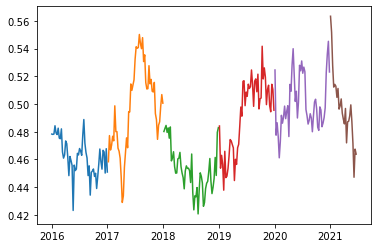

In [184]:
for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["valence"]
    plt.plot(dates, y_axis)



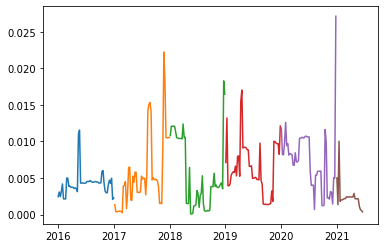

In [185]:
for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["instrumentalness"]
    plt.plot(dates, y_axis)



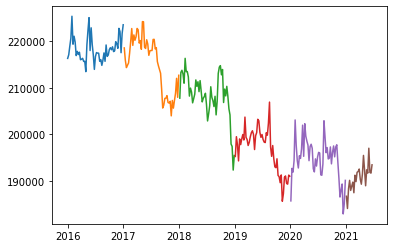

In [186]:
for year in years_df_list:
    groupby_weeks = year.groupby(by="Date")
    weekly_means = groupby_weeks.mean()
    dates = weekly_means.index
    y_axis = weekly_means["duration_ms"]
    plt.plot(dates, y_axis)

#about 3.6minutes down to 3.1... 30second drop in average duration


# Stacked years

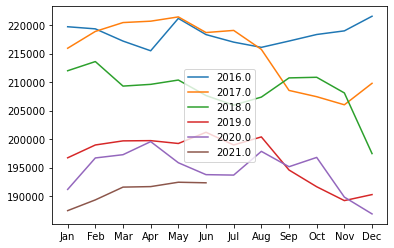

In [187]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["duration_ms"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()

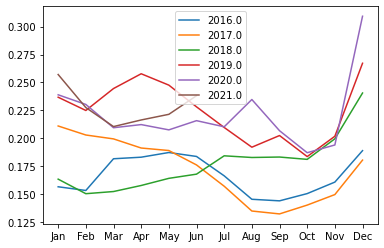

In [188]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["acousticness"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()

#gradual increase over the years
#uptick in Dec


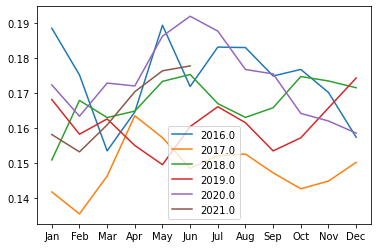

In [189]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["liveness"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()

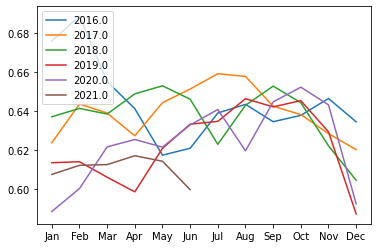

In [190]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["energy"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()

#downtick in Dec

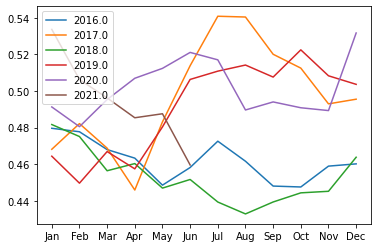

In [191]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["valence"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()

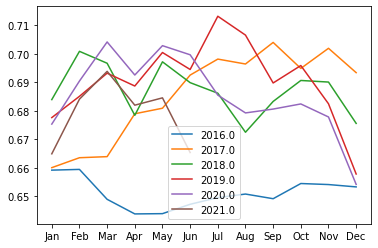

In [192]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["danceability"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()
#downtick in Dec

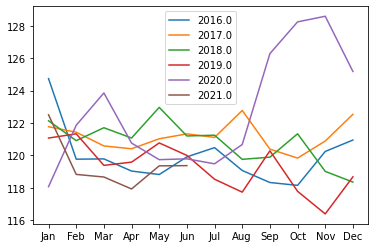

In [193]:
#durations of songs by year
#TODO: convert ms to minute/second, fix legend, 
months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for year in years_df_list:
    groupby_month = year.groupby(by="Month")
    monthly_means = groupby_month.mean()
    y_axis = monthly_means["tempo"]
    if len(y_axis) == 6:
        months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
    plt.plot(months, y_axis, label=year["Year"].mean())
plt.legend()

# combine above charts in one

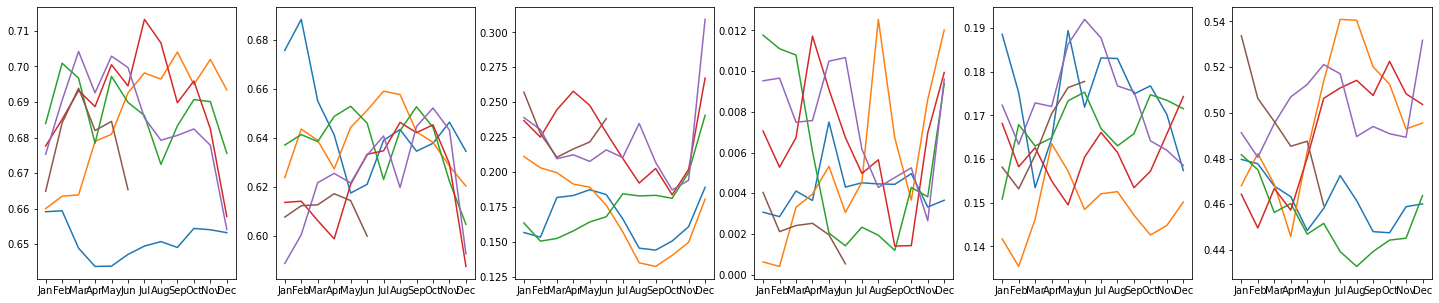

In [194]:
#TODO: formatting, legend
# STATISTICAL ANALYSIS OF DEC MEAN VS ALL OTHER VALUES TO DETERMINE SIGNIFICANCE

audio_feature_list = ["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence"]

fig, axes = plt.subplots(1,6)
for i in range(len(audio_feature_list)): 
    months = ["Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for year in years_df_list:
        groupby_month = year.groupby(by="Month")
        monthly_means = groupby_month.mean()
        y_axis = monthly_means[audio_feature_list[i]]
        if len(y_axis) == 6:
            months = ["Jan", "Feb", "Mar", "Apr", "May","Jun"]
        axes[i].plot(months, y_axis, label=year["Year"].mean())
fig.set_size_inches(25, 5)


# bar charts

<BarContainer object of 20 artists>

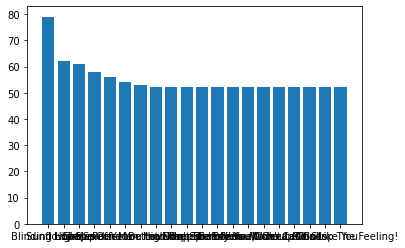

In [199]:
#Most weeks on charts
groupby_artist = merged.groupby(by=["Artist", "Title"])
count_of_songs = groupby_artist["Date"].count()
count_of_songs.sort_values(ascending=False, inplace=True)
top_songs = {"Artist": [], "Title": [], "Count": []}
count = []
artist = []
title = []
#Change range for close up of top x
for i in range(20):
    top_songs["Count"].append(count_of_songs[i])
    top_songs["Artist"].append(count_of_songs.index[i][0])
    top_songs["Title"].append(count_of_songs.index[i][1])

top_songs_df = pd.DataFrame(top_songs)
plt.bar(top_songs_df["Title"], top_songs_df["Count"])

# The Weeknd's Blinding Lights had the longest run by far (~30% longer than 2nd place)